# Metoda odwrotnej dystrybuanty

Dla przypadków, w których możemy łatwo wyznaczać $m(t)=(\int^t_0\lambda(s)ds)$ można użyć alternatywnego algorytmu.

1. Dla ustalonego $T$ wygenerować zmienną $N_t$~Poiss$(m(T))$.
2. Za czasy oczekiwania wziąć $N_t$ posortowanych zmiennych o dystrybuancie $F(t)=\frac{m(t)}{m(T)}$.

Sprawdź również jego działanie.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import typing

In [2]:
def quantile_fun(lam_t: typing.Callable, T: int, size: int):
    """Funkcja generująca niejednorodny proces Poissona metodą odwrotnej dystrybuanty.
    Input:
        lam_t (function) - funkcja intensywności,
        T (int) - kompozyt czasowy,
        size (int) - rozmiar dla generowanej zmiennej losowej.
    Output:
        S (np.array) -  momenty skoków."""
    calka_intensywnosci = scipy.integrate.quad(func=lam_t, a=0, b=T)[0]
    zmienne = np.random.poisson(lam=calka_intensywnosci, size=size)
    S = []
    F_inverse = lambda x: np.searchsorted(
        np.cumsum([lam_t(t) / calka_intensywnosci for t in np.linspace(0, T, 100)]), x
    )
    for i in zmienne:
        S = np.append(S, [F_inverse(j) for j in np.random.uniform(size=i)])
    S.sort()
    return S


def lam_t(t: int) -> int:
    """Funkcja intensywności dla niejednorodnego procesu Poissona zwracająca λ(t)=t."""
    return t

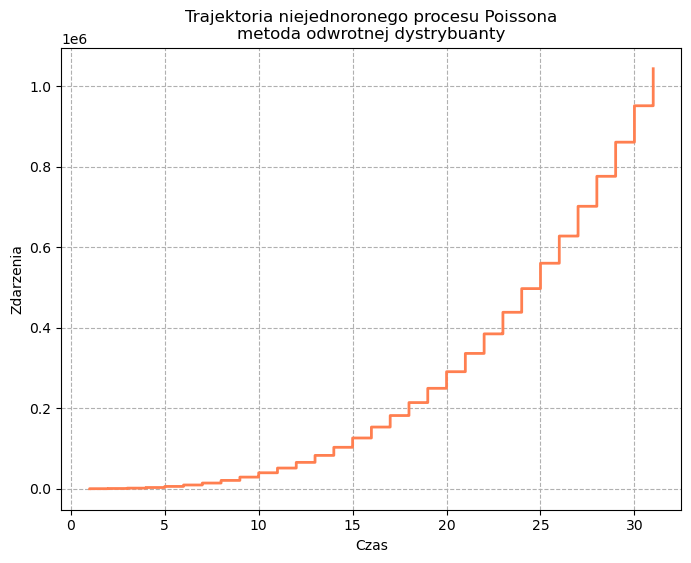

In [3]:
T, N = 10, 1000
skoki = quantile_fun(lam_t=lam_t, T=T, size=N)

plt.figure(figsize=(8, 6))
plt.step(skoki, np.cumsum(skoki), color="coral", lw=2)
plt.xlabel("Czas")
plt.ylabel("Zdarzenia")
plt.title("Trajektoria niejednoronego procesu Poissona\nmetoda odwrotnej dystrybuanty")
plt.grid(linestyle="--")
plt.show()

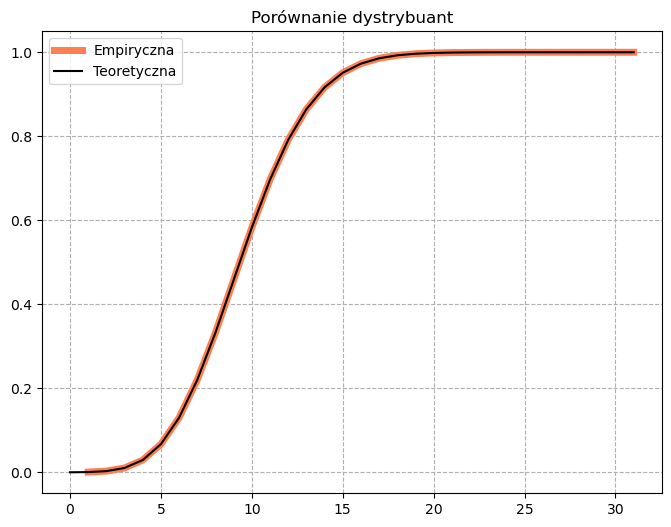

In [4]:
t = np.arange(0, 32)
plt.figure(figsize=(8, 6))
plt.plot(
    skoki,
    scipy.stats.poisson.cdf(skoki, lam_t(T)),
    label="Empiryczna",
    color="coral",
    lw=5,
)
plt.plot(t, scipy.stats.poisson.cdf(t, lam_t(T)), label="Teoretyczna", color="black")
plt.legend()
plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.show()